# Análisis de nube de palabras

Instalamos las librerías requeridas

In [ ]:
! pip install wordcloud

In [ ]:
! pip install nltk

In [ ]:
! pip install PyPDF2

Importamos librerías

In [18]:
import nltk
from nltk.corpus import stopwords
#nltk.download() Usar solo una vez para descargar modulo wordcloud
from PyPDF2 import PdfReader
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
# Definimos las palabras a excluir del análisis
stop_words_sp = set(stopwords.words('spanish'))

Descargamos ambos documentos

In [19]:
! wget https://www.oas.org/dil/esp/constitucion_chile.pdf

--2023-11-04 19:51:59--  https://www.oas.org/dil/esp/constitucion_chile.pdf
Resolving www.oas.org (www.oas.org)... 207.237.157.11
Connecting to www.oas.org (www.oas.org)|207.237.157.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416675 (407K) [application/pdf]
Saving to: ‘constitucion_chile.pdf’

constitucion_chile. 100%[===================>] 406.91K  --.-KB/s    in 0.1s    

2023-11-04 19:52:00 (2.93 MB/s) - ‘constitucion_chile.pdf’ saved [416675/416675]



In [20]:
! wget https://www.diarioconstitucional.cl/wp-content/uploads/2023/10/PROPUESTA-DE-NUEVA-CONSTITUCION-POLITICA-DE-LA-REPUBLICA.pdf

--2023-11-04 19:52:29--  https://www.diarioconstitucional.cl/wp-content/uploads/2023/10/PROPUESTA-DE-NUEVA-CONSTITUCION-POLITICA-DE-LA-REPUBLICA.pdf
Resolving www.diarioconstitucional.cl (www.diarioconstitucional.cl)... 128.199.0.106
Connecting to www.diarioconstitucional.cl (www.diarioconstitucional.cl)|128.199.0.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1415309 (1.3M) [application/pdf]
Saving to: ‘PROPUESTA-DE-NUEVA-CONSTITUCION-POLITICA-DE-LA-REPUBLICA.pdf’

PROPUESTA-DE-NUEVA- 100%[===================>]   1.35M  2.90MB/s    in 0.5s    

2023-11-04 19:52:29 (2.90 MB/s) - ‘PROPUESTA-DE-NUEVA-CONSTITUCION-POLITICA-DE-LA-REPUBLICA.pdf’ saved [1415309/1415309]



### Análisis

In [40]:
def extraer_PDF(archivo_pdf):
  """
  input: archivo pdf
  output: texto en objeto string
  """
  reader = PdfReader(archivo_pdf)
  texto = ''
  for i in range(len(reader.pages)):
    page = reader.pages[i]
    texto = texto + page.extract_text()
  texto = texto.replace('\n', ' ')
  return texto

In [41]:
texto_actual = extraer_PDF("constitucion_chile.pdf")

In [43]:
propuesta_2023 = extraer_PDF('PROPUESTA-DE-NUEVA-CONSTITUCION-POLITICA-DE-LA-REPUBLICA.pdf')

In [90]:
# Podemos excluir más palabras del análisis
stop_words_sp.add('Artículo')
stop_words_sp.add('artículo')
stop_words_sp.add('ley')

Generamos las nubes de palabras

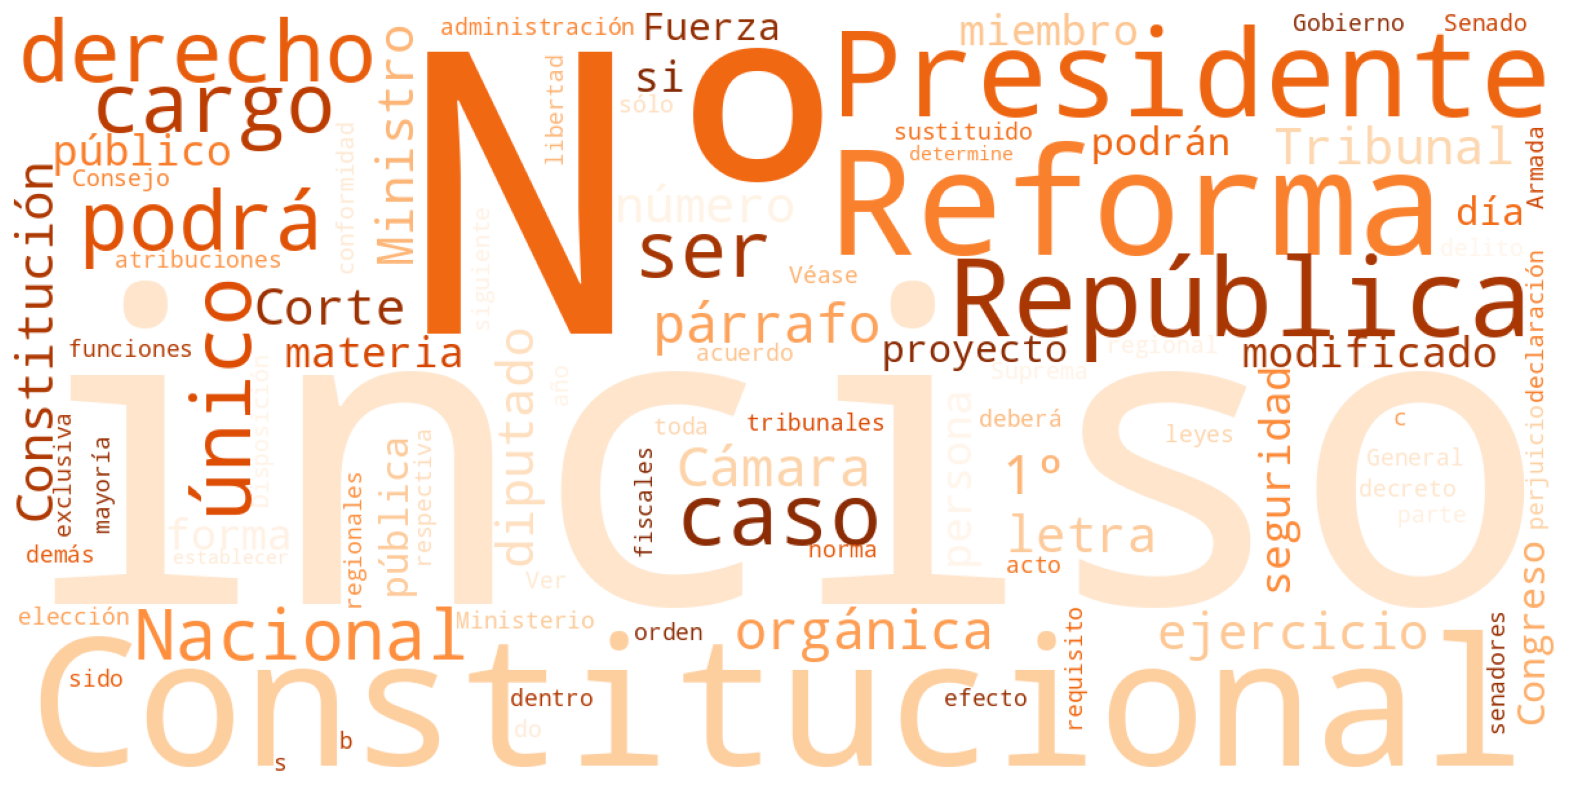

In [94]:
custom_palette = "Oranges"
wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=100,
        max_font_size=200,
        scale=3,
        random_state=3,
        collocations=False,  # Desactiva la paleta de colores predeterminada
        colormap=custom_palette)
wordcloud.generate(texto_actual)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off')
#plt.show()
plt.savefig("actual.svg") # Prueba con la extensión ".png" si no quieres archivos vectoriales

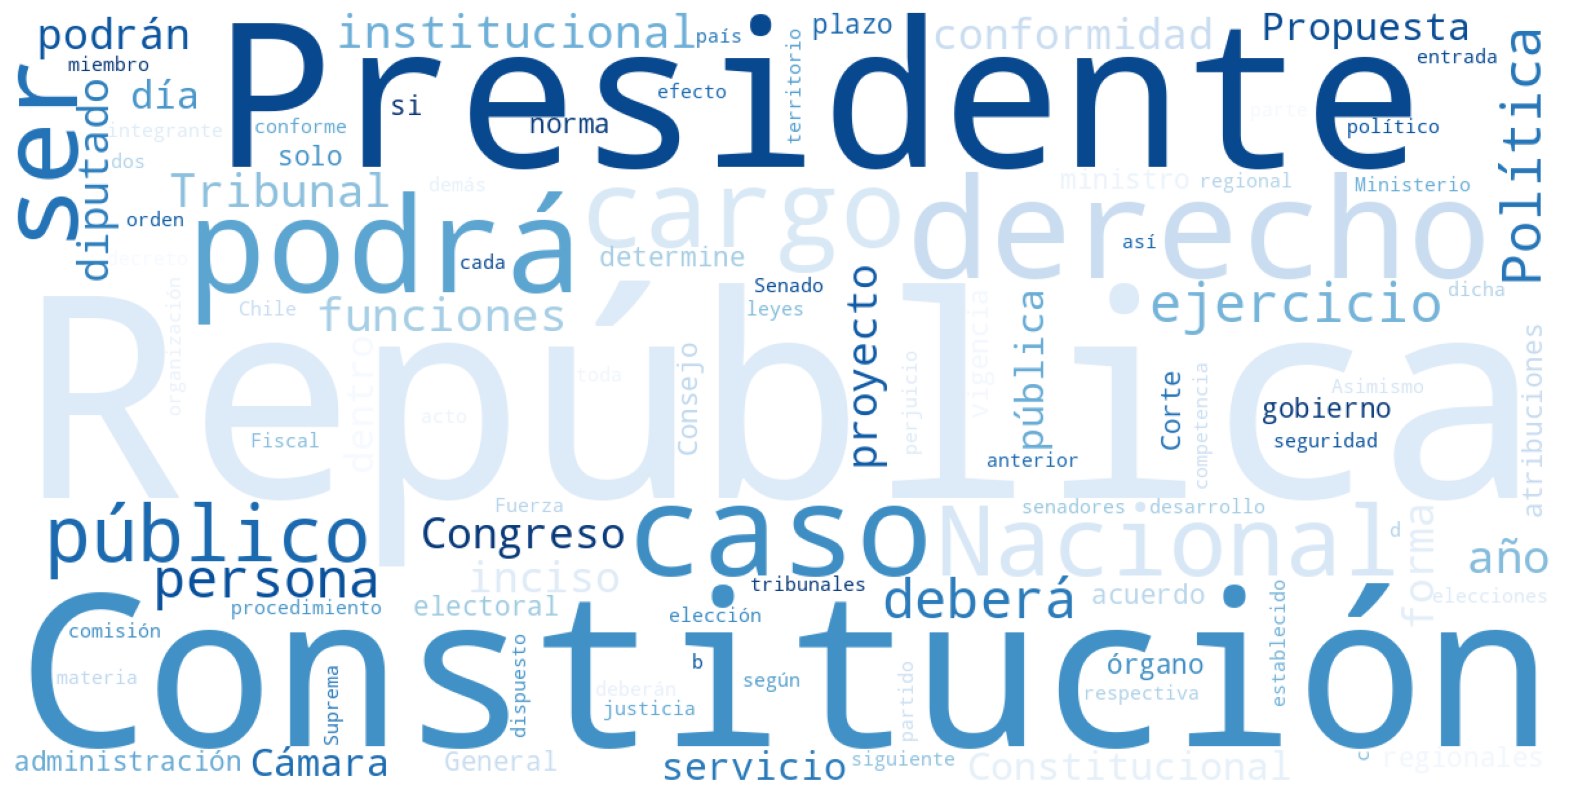

In [93]:
custom_palette = "Blues"

wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=100,
        max_font_size=200,
        scale=3,
        random_state=3,
        collocations=False,  # Desactiva la paleta de colores predeterminada
        colormap=custom_palette)
wordcloud.generate(propuesta_2023)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off')
#plt.show()
plt.savefig("propuesta.svg") # Prueba con la extensión ".png" si no quieres archivos vectoriales